<a href="https://colab.research.google.com/github/rvssridatta/ML/blob/main/27_BreastcancerTumorPrediction_XGBOOST/27_2_ML_Evaluation_BreastCancer_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#evaluating breast cancer

In [2]:
#loading dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [4]:
dataset = pd.read_csv('dataset.csv')
dataset.shape

(683, 11)

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [8]:
#!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#evaluating various algorithm

#6 ML Algorithm
#!pip install scikit-learn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [15]:
models = []

models.append(('LR',LogisticRegression(solver = 'liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma = 'auto')))

LR: 0.653838 (0.005145)
LDA: 0.965219 (0.027599)
KNN: 0.613367 (0.053558)
CART: 0.945084 (0.024600)
NB: 0.759495 (0.069983)
SVM: 0.661145 (0.012622)


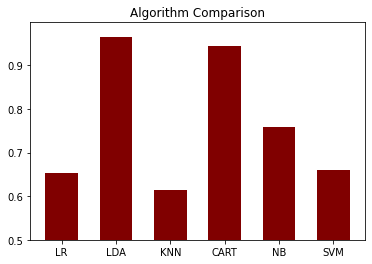

In [18]:
result = []
names = []
res = []

for name,model in models:
  kfold = StratifiedKFold(n_splits = 10,random_state = None)
  cv_results = cross_val_score(model,X_train,y_train,cv = kfold,scoring = 'accuracy')
  result.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

plt.ylim(.500,.999)
plt.bar(names,res,color = 'maroon',width = 0.6)

plt.title('Algorithm Comparison')
plt.show()
